# Demo of Evaluation and Benchmarking Functionalities

The following examples have been vastly implemented in functions in the file CellAnalysis/eval.py, CellAnalysis/adc_metric.py and in the modified package mAP_3Dvolume that has been forked from https://github.com/ygCoconut/mAP_3Dvolume. 

In [1]:
import os
import sys
path = os.path.dirname(os.path.abspath(""))+"/"
sys.path.append(path)

In [2]:
from CellAnalysis.eval import benchmark
import matplotlib.pyplot as plt

In [3]:
from CellAnalysis.eval import benchmark
import os

path = os.path.dirname(os.path.abspath(""))+"/"
file_root = path + 'example_data/benchmark/EM Data'
benchmark = benchmark(file_root, resolution=(0.51, 0.51, 0.51))

Load data of type EM Data ...
Load 3 Ground Truth test instance(s) ...
Load prediction mask instance(s) from models: ['Cellpose', 'U3D-BCD', 'Stardist'] ...
Dataloading finished succesfully!


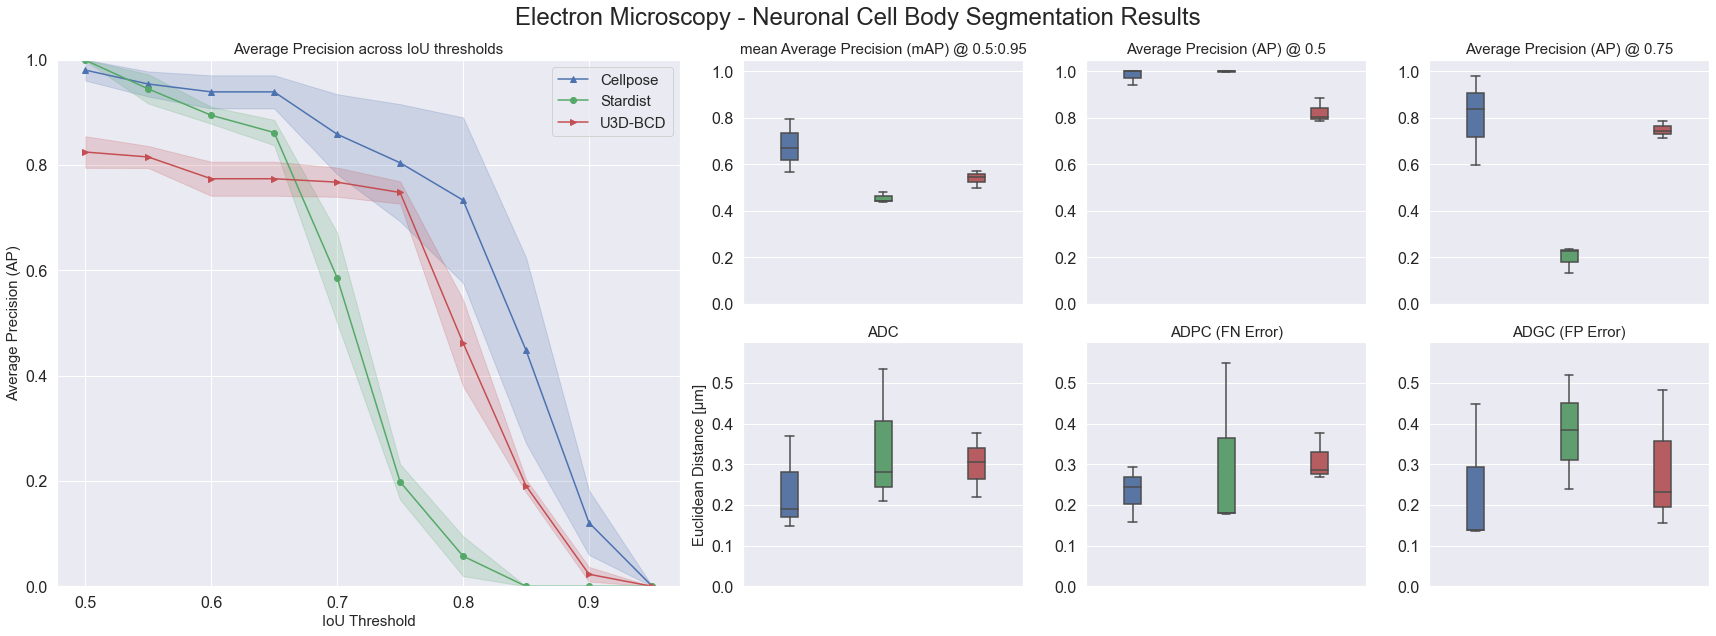

In [4]:
benchmark.summarize(title='Electron Microscopy - Neuronal Cell Body Segmentation Results', save_to_file='plots/EM_Results', error_bands=True, figsize=(24, 9))

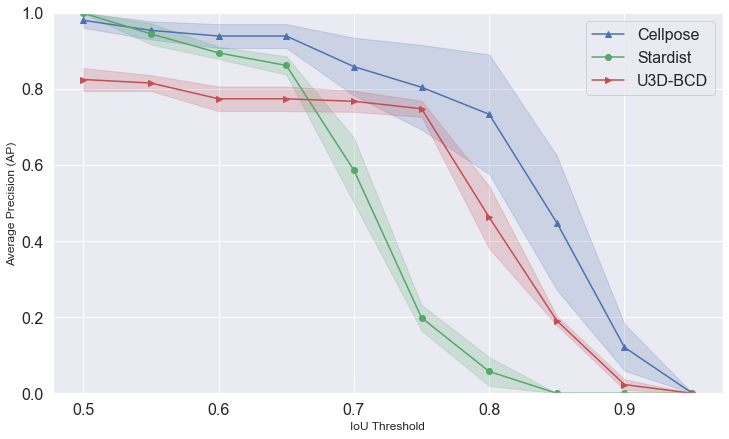

In [6]:
benchmark.plot_ap_curves(error_band=True)

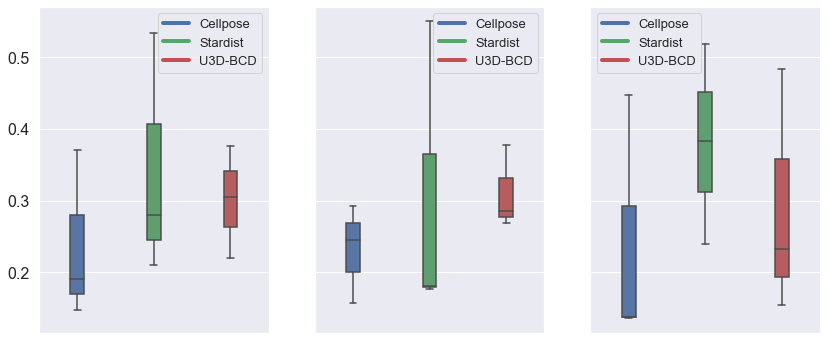

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,6), sharey=True)

ax1 = benchmark.plot_error_bars(ax=ax1, metric='adc', legend_fontsize=13)
ax2 = benchmark.plot_error_bars(ax=ax2, metric='adpc', legend_fontsize=13)
ax3 = benchmark.plot_error_bars(ax=ax3, metric='adgc', legend_fontsize=13)

In [9]:
benchmark.show_adc_scores()

----------------------------------------------------------------------------------------------------
Compute distance metrics for Cellpose for EM Data...

Average Distance between Centroids for Cellpose:                                       0.236 ± 0.102
Average Distance between Prediction Centroids for Cellpose:                            0.232 ± 0.107
Average Distance between Ground Truth Centroids for Cellpose:                          0.241 ± 0.098
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Compute distance metrics for Stardist for EM Data...

Average Distance between Centroids for Stardist:                                       0.342 ± 0.121
Average Distance between Prediction Centroids for Stardist:                            0.303 ± 0.096
Average Distance between Ground Truth Centroids for Stardist:                       

<AxesSubplot:>

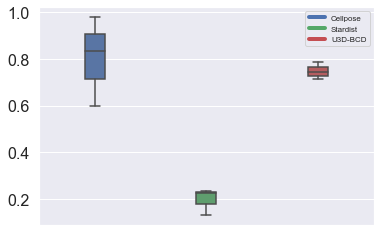

In [10]:
benchmark.plot_error_bars(metric='AP @ 0.75')

In [11]:
from CellAnalysis.eval import evaluate

In [12]:
file_root = path + 'example_data/evaluate/EM Data'
evala = evaluate(file_root, resolution=(0.51, 0.51, 0.51))

Load data of type EM Data ...
Load 3 Ground Truth test instance(s) ...
Dataloading finished succesfully!


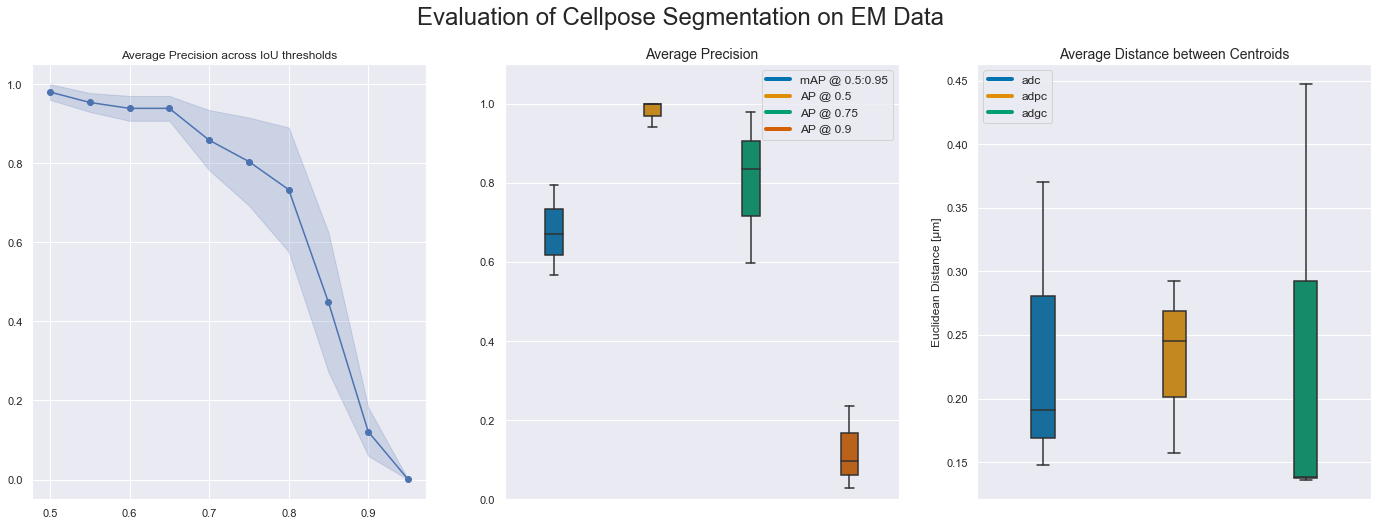

In [13]:
evala.summarize(figsize=(24, 8), error_bands=True, title='Evaluation of Cellpose Segmentation on EM Data')

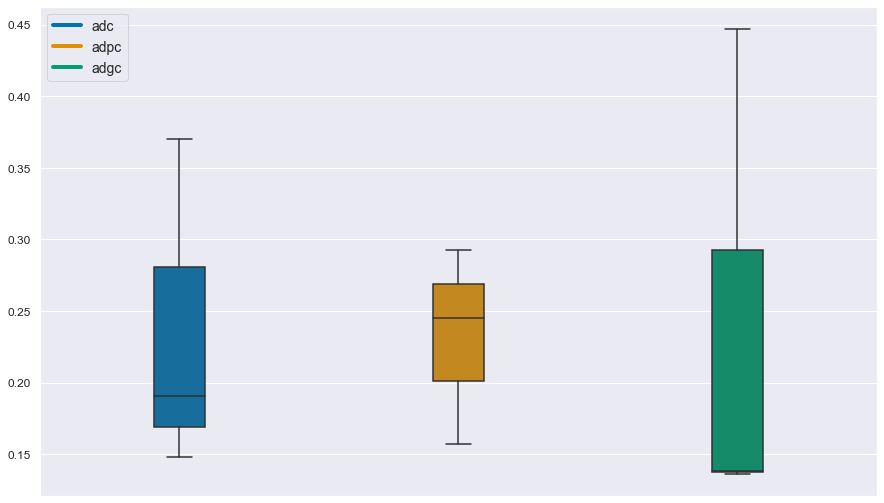

In [14]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 9))
sns.set()
evala.box_plots(ax, legend_font_size=14, legend_loc='upper left')
plt.show()